<a href="https://colab.research.google.com/github/mfathul21/airline-customer-value/blob/main/Airline_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Customer Value Analysis

## Domain Proyek

Dalam industri penerbangan yang dinamis dan kompetitif, pemahaman yang mendalam tentang pelanggan menjadi kunci untuk kesuksesan bisnis jangka panjang. Melalui proyek segmentasi pelanggan, maskapai penerbangan bertujuan untuk membagi basis pelanggan mereka menjadi segmen yang lebih kecil dan lebih terdefinisi dengan jelas. Tujuan utama dari segmentasi ini adalah untuk mengidentifikasi pola perilaku yang berbeda di antara pelanggan, memahami preferensi mereka, dan mengenali kebutuhan yang spesifik dari setiap segmen.

Dengan pemahaman yang lebih baik tentang berbagai segmen pelanggan, maskapai penerbangan akan dapat menyesuaikan strategi pemasaran mereka secara lebih efektif. Ini mungkin meliputi penawaran promosi yang disesuaikan, pengembangan program loyalitas yang lebih relevan, atau penyediaan layanan tambahan yang sesuai dengan kebutuhan masing-masing segmen. Selain itu, segmentasi pelanggan juga membantu maskapai penerbangan untuk mengidentifikasi peluang untuk pertumbuhan bisnis, seperti menargetkan segmen yang belum dimanfaatkan sepenuhnya atau mengembangkan produk atau layanan baru yang sesuai dengan kebutuhan pasar.

## Business Understanding

**Problem Statement:** Maskapai penerbangan menghadapi lingkungan bisnis yang dinamis dan kompetitif, di mana pemahaman mendalam tentang pelanggan menjadi krusial untuk kesuksesan jangka panjang. Namun, dengan basis pelanggan yang besar dan beragam, sulit bagi maskapai penerbangan untuk secara efektif memahami preferensi, kebutuhan, dan pola perilaku pelanggan mereka.

**Goals:**
1. Memahami secara mendalam pola perilaku, preferensi, dan kebutuhan pelanggan maskapai penerbangan.
2. Memecah basis pelanggan menjadi segmen yang lebih kecil dan lebih terdefinisi untuk memungkinkan penyesuaian strategi pemasaran yang lebih efektif.
3. Mengidentifikasi peluang untuk peningkatan pertumbuhan bisnis melalui segmentasi pelanggan yang lebih baik.
4. Mengembangkan strategi pemasaran yang disesuaikan, program loyalitas yang lebih relevan, dan layanan tambahan yang sesuai dengan kebutuhan masing-masing segmen.

**Solution Statement:** Melalui proyek segmentasi pelanggan, kami akan menganalisis data historis dan fitur pelanggan untuk membagi basis pelanggan maskapai penerbangan menjadi segmen yang lebih kecil dan lebih terdefinisi. Kami akan menggunakan teknik analisis data yang canggih untuk mengidentifikasi pola perilaku yang berbeda di antara pelanggan, memahami preferensi mereka, dan mengenali kebutuhan yang spesifik dari setiap segmen. Dengan demikian, kami akan memberikan wawasan yang lebih dalam kepada maskapai penerbangan tentang profil pelanggan mereka, memungkinkan mereka untuk mengambil keputusan yang lebih tepat dan berbasis data dalam upaya untuk memperkuat hubungan dengan pelanggan dan meningkatkan kinerja bisnis mereka secara keseluruhan.

## Data Understanding

## Data Loading

### Import Library

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Read Data

In [3]:
url = "https://drive.google.com/uc?id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U"
airline = pd.read_csv(url)

airline.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
53111,52929,1/1/2013,1/12/2013,Male,4,daqing,heilongjiang,CN,44.0,3/31/2014,3,2481,1440.0,739.0,3030,11/2/2013,151,147.000000,293,0,0.756667,2481,0
24241,62785,7/20/2006,7/23/2006,Male,4,haerbin,heilongjiang,CN,52.0,3/31/2014,8,7611,3121.0,5298.0,14542,3/17/2014,15,78.142857,225,0,0.681932,7611,0
44666,8217,7/30/2011,7/30/2011,Male,4,beijing,beijing,CN,34.0,3/31/2014,7,1841,1909.0,1690.0,8091,12/11/2013,112,102.833333,207,0,0.455722,2341,2
62807,9421,11/20/2012,2/10/2013,Female,4,guangzhou,guangdong,CN,29.0,3/31/2014,2,200,490.0,175.0,1096,4/8/2013,359,57.000000,57,0,0.475000,203,1
19857,44760,4/11/2008,4/11/2008,Male,4,fushun,liaoning,CN,43.0,3/31/2014,9,10567,3012.0,7237.0,13595,11/21/2013,132,71.875000,182,2,0.905698,10567,2


In [4]:
airline.shape

(62988, 23)

## Exploratory Data Analysis

### Feature Description

| Column Name       | Description                                                     |
|-------------------|-----------------------------------------------------------------|
| MEMBER_NO         | ID Member                                                       |
| FFP_DATE          | Frequent Flyer Program Join Date                                |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama                                     |
| GENDER            | Jenis Kelamin                                                   |
| FFP_TIER          | Tier dari Frequent Flyer Program                                |
| WORK_CITY         | Kota Asal                                                       |
| WORK_PROVINCE     | Provinsi Asal                                                   |
| WORK_COUNTRY      | Negara Asal                                                     |
| AGE               | Umur Customer                                                   |
| LOAD_TIME         | Tanggal data diambil                                            |
| FLIGHT_COUNT      | Jumlah penerbangan Customer                                     |
| BP_SUM            | Rencana Perjalanan                                              |
| SUM_YR_1          | Fare Revenue                                                    |
| SUM_YR_2          | Votes Prices                                                    |
| SEG_KM_SUM        | Total jarak(km) penerbangan yg sudah dilakukan                   |
| LAST_FLIGHT_DATE  | Tanggal penerbangan terakhir                                    |
| LAST_TO_END       | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL      | Rata-rata jarak waktu                                           |
| MAX_INTERVAL      | Maksimal jarak waktu                                            |
| EXCHANGE_COUNT    | Jumlah penukaran                                                |
| avg_discount      | Rata rata discount yang didapat customer                        |
| Points_Sum        | Jumlah poin yang didapat customer                               |
| Point_NotFlight   | point yang tidak digunakan oleh members                         |


In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Hasil dari `.info()` menunjukkan adanya keberadaan data yang hilang pada beberapa fitur seperti GENDER, WORK_CITY, WORK_PROVINCE, dan beberapa fitur lainnya yang memerlukan penanganan khusus pada tahap Data Preprocessing. Selain itu, terdapat beberapa fitur seperti FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, dan LAST_FLIGHT_DATE yang seharusnya memiliki tipe data datetime karena merepresentasikan tanggal, namun saat ini memiliki tipe data 'object'.

In [6]:
# Rename columns to lowercase
airline.columns = airline.columns.str.lower()

In [7]:
airline.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [8]:
airline.describe(include='O')

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### Univariate Analysis

In [9]:
numerical_features = airline.select_dtypes(['int64', 'float64']).columns.to_list()
categorical_features = airline.select_dtypes(['object']).columns.to_list()

print(f"Jumlah Fitur Numerik: {len(numerical_features)}")
print(f"Jumlah Fitur Kategorik: {len(categorical_features)}")

Jumlah Fitur Numerik: 15
Jumlah Fitur Kategorik: 8


In [10]:
def categorical_plot(data, col):
  df = data[col].value_counts().reset_index()
  df.columns = [col, 'count']
  len_df = len(df)

  if len_df <= 10:
    sns.barplot(x=col, y='count', data=df)
    plt.title(col)
    plt.tight_layout()
    plt.show()

  else:
    top_10 = df.head(10)
    sns.barplot(x=col, y='count', data=top_10)
    plt.title(f"Top 10 of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: ffp_date, Length: 3068, dtype: int64 



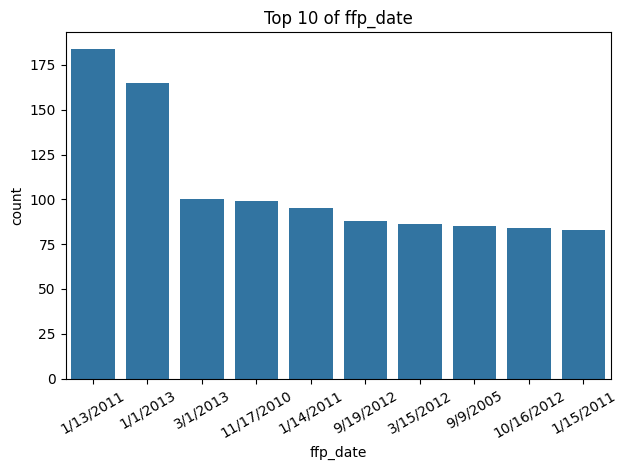

In [11]:
print(airline[categorical_features[0]].value_counts(), '\n')
categorical_plot(airline, categorical_features[0])

2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: first_flight_date, Length: 3406, dtype: int64 



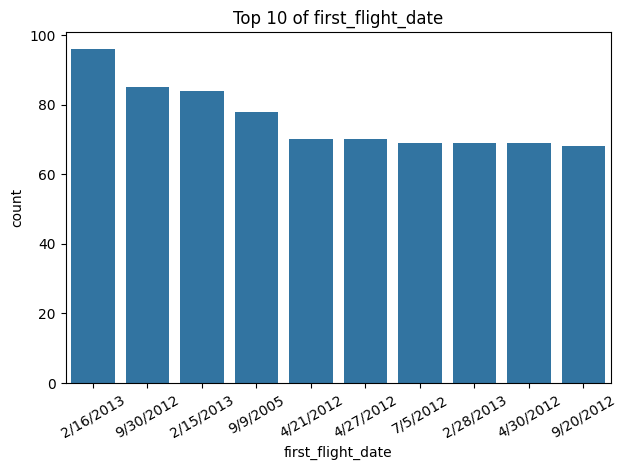

In [12]:
print(airline[categorical_features[1]].value_counts(), '\n')
categorical_plot(airline, categorical_features[1])

Male      48134
Female    14851
Name: gender, dtype: int64 



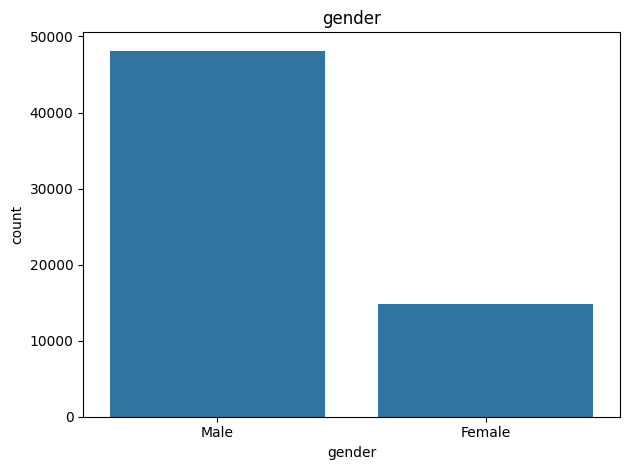

In [13]:
print(airline[categorical_features[2]].value_counts(), '\n')
categorical_plot(airline, categorical_features[2])

guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: work_city, Length: 3234, dtype: int64 



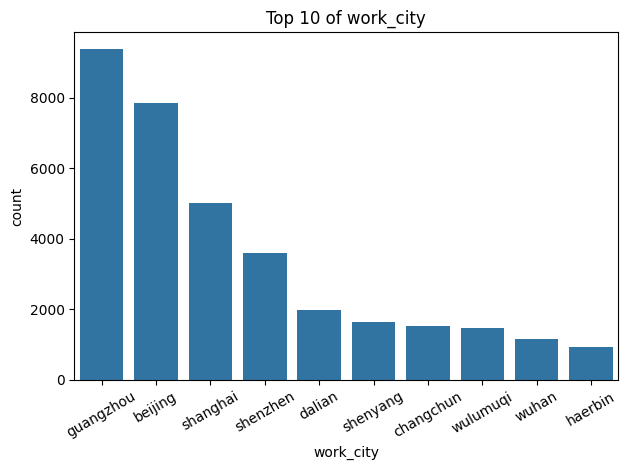

In [14]:
print(airline[categorical_features[3]].value_counts(), '\n')
categorical_plot(airline, categorical_features[3])

guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: work_province, Length: 1165, dtype: int64 



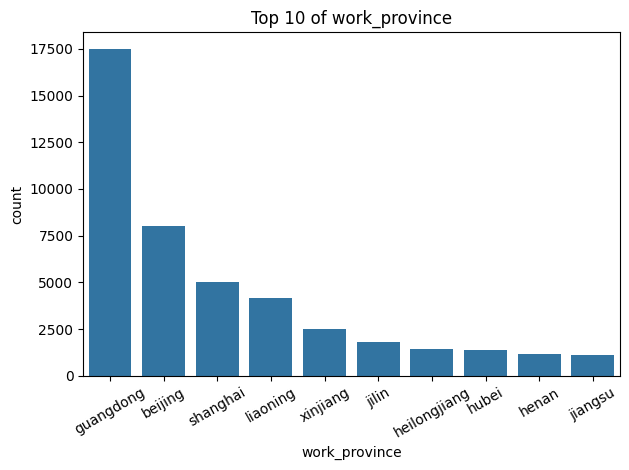

In [15]:
print(airline[categorical_features[4]].value_counts(), '\n')
categorical_plot(airline, categorical_features[4])

CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: work_country, Length: 118, dtype: int64 



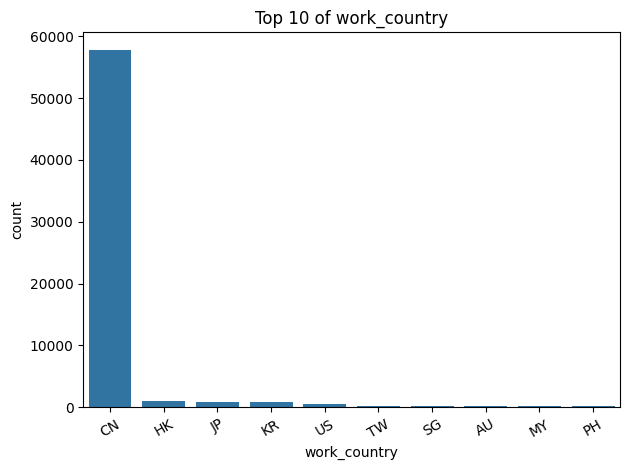

In [16]:
print(airline[categorical_features[5]].value_counts(), '\n')
categorical_plot(airline, categorical_features[5])

3/31/2014    62988
Name: load_time, dtype: int64 



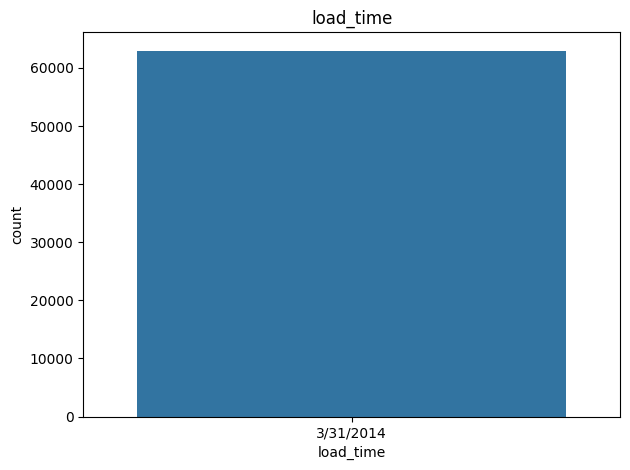

In [17]:
print(airline[categorical_features[6]].value_counts(), '\n')
categorical_plot(airline, categorical_features[6])

3/31/2014    959
3/30/2014    933
3/28/2014    924
3/29/2014    779
3/27/2014    767
            ... 
4/14/2012      6
4/6/2012       3
4/2/2012       3
4/4/2012       3
4/1/2012       1
Name: last_flight_date, Length: 731, dtype: int64 



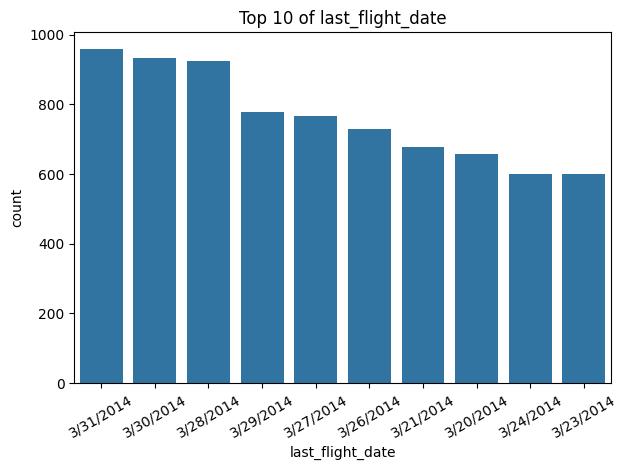

In [18]:
print(airline[categorical_features[7]].value_counts(), '\n')
categorical_plot(airline, categorical_features[7])

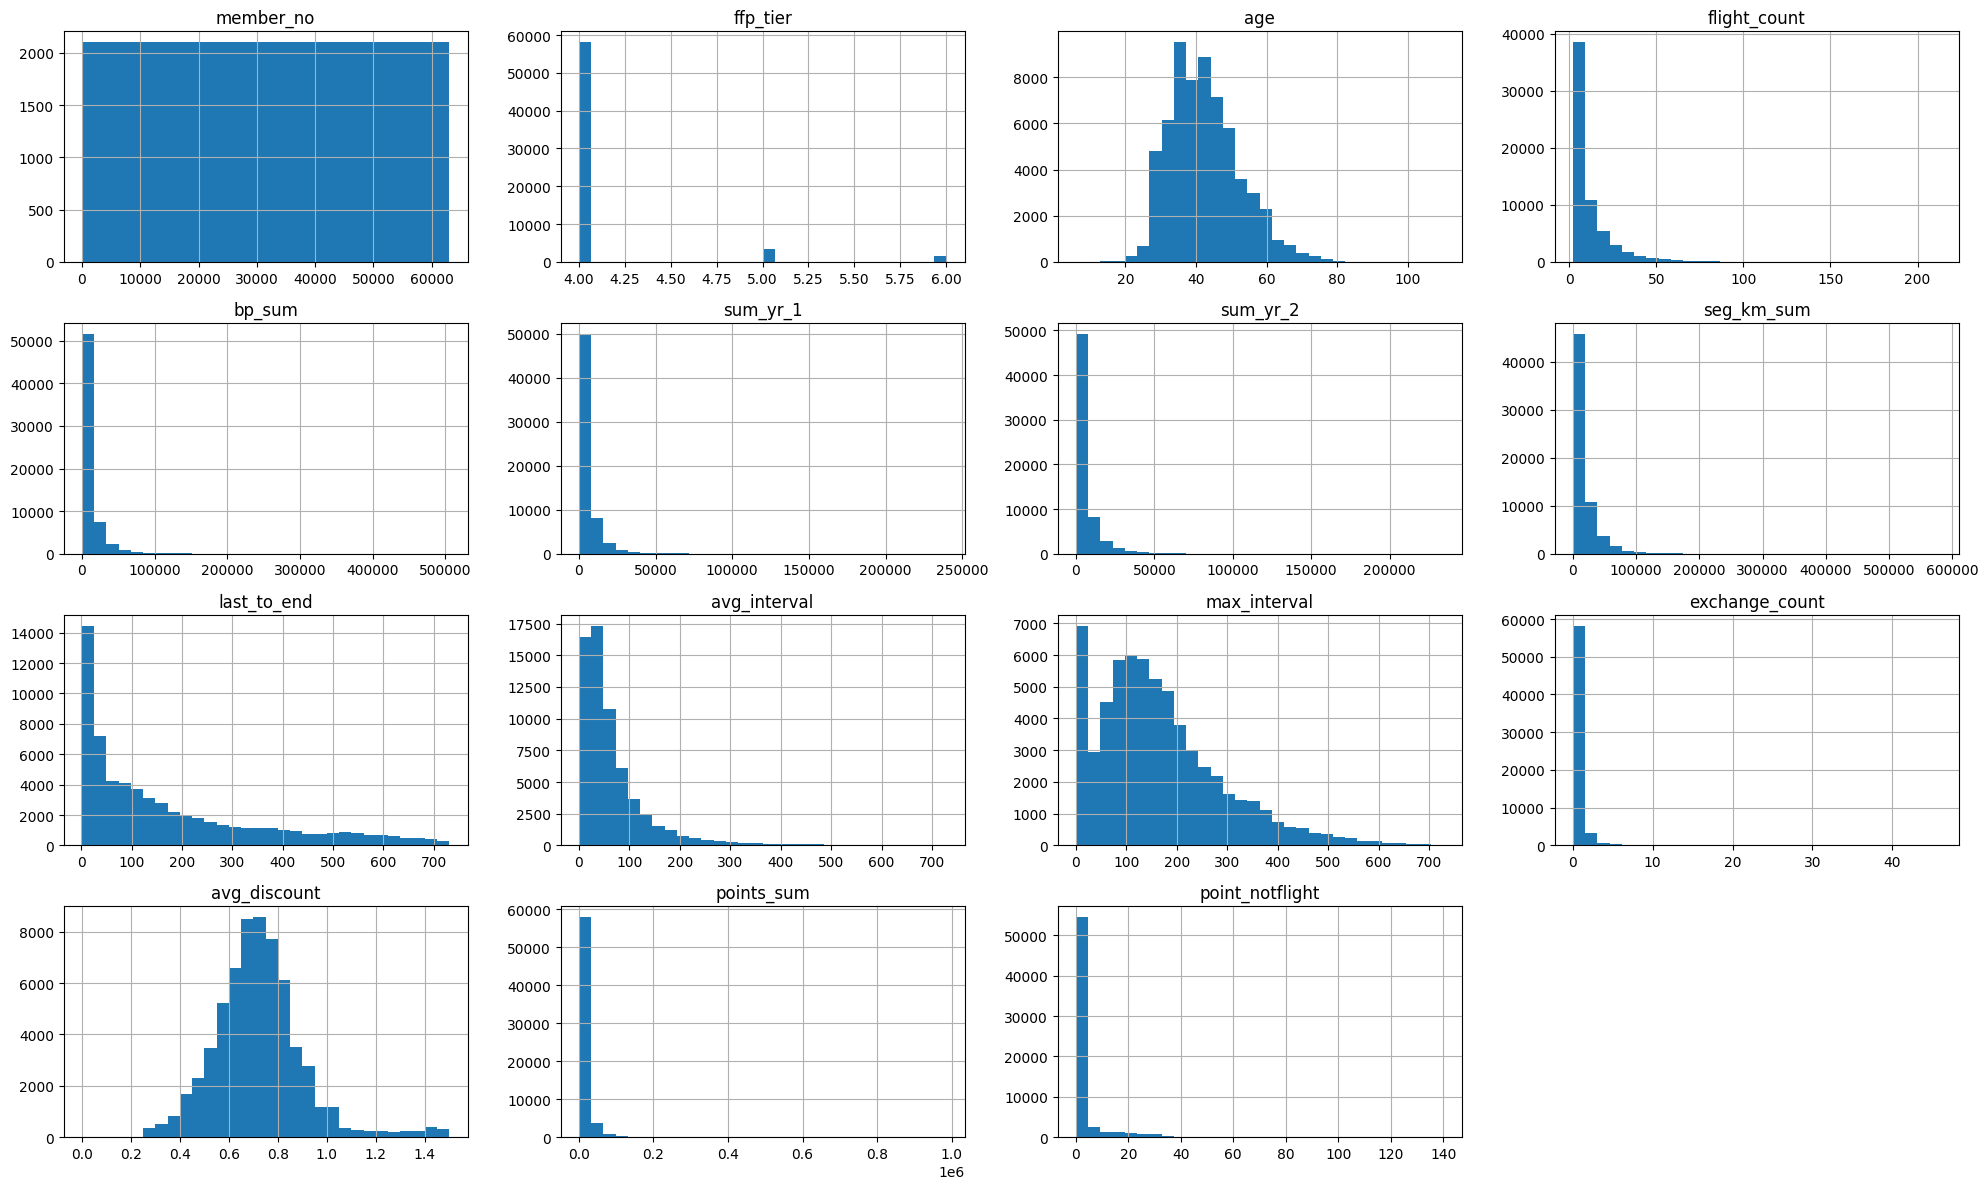

In [19]:
airline.hist(bins=30, figsize=(20,12))

plt.tight_layout()
plt.show()

### Multivariate Analysis

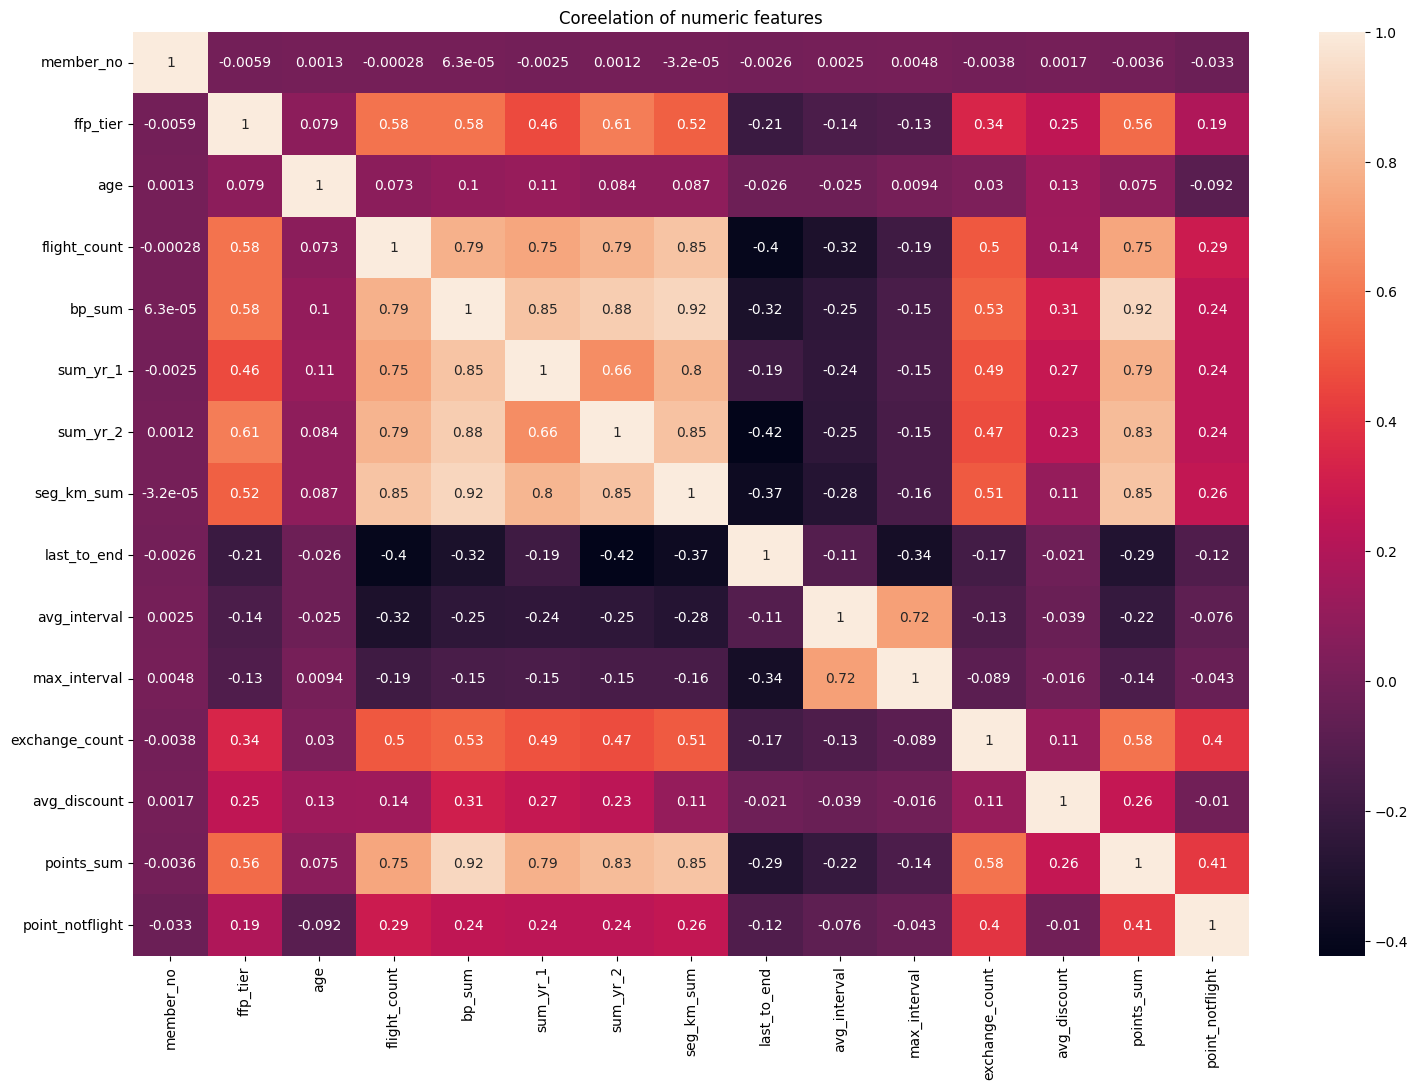

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(airline.corr(numeric_only=True), annot=True)
plt.title("Coreelation of numeric features")

plt.show()

## Data Preprocessing

**Handling Missing Values**

In [21]:
airline.isna().sum() / len(airline)

member_no            0.000000
ffp_date             0.000000
first_flight_date    0.000000
gender               0.000048
ffp_tier             0.000000
work_city            0.036023
work_province        0.051565
work_country         0.000413
age                  0.006668
load_time            0.000000
flight_count         0.000000
bp_sum               0.000000
sum_yr_1             0.008748
sum_yr_2             0.002191
seg_km_sum           0.000000
last_flight_date     0.000000
last_to_end          0.000000
avg_interval         0.000000
max_interval         0.000000
exchange_count       0.000000
avg_discount         0.000000
points_sum           0.000000
point_notflight      0.000000
dtype: float64

Sebelum dilakukan drop missing value atau treatment lain, akan dilakukan pengecekan hubungan nilai yang hilang tersebut dengan fitur lainnya sehingga bisa diperoleh suatu insight kemungkinan kenapa nilai tersebut hilang dan bagaimana treatment yang tepat untuk diberikan.

In [22]:
airline[airline['sum_yr_1'].isna()].sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
48274,51441,3/31/2012,3/31/2012,Male,4,shanghaishi,shanghai,CN,32.0,3/31/2014,3,2943,NaN,0.0,3459,1/21/2013,436,147.0,292,0,0.879445,2943,0
57360,8115,1/1/2013,1/24/2013,Male,4,mingshuixian,heilongjiang,CN,49.0,3/31/2014,2,1344,NaN,0.0,3694,1/31/2013,426,7.0,7,0,0.450000,1344,0
56080,30870,12/25/2008,2/18/2011,Female,4,shenzhen,guangdong,CN,27.0,3/31/2014,3,1452,NaN,0.0,4122,7/2/2012,639,29.0,44,0,0.450000,1452,0
52119,7977,9/29/2012,9/30/2012,Female,4,shenyangshi,liaoningsheng,CN,27.0,3/31/2014,2,2386,NaN,0.0,2710,10/6/2012,543,6.0,6,0,0.900000,2386,0
61545,44285,10/15/2012,10/15/2012,Male,4,haerbin,heilongjiang,CN,42.0,3/31/2014,2,790,NaN,0.0,2081,10/15/2012,534,0.0,0,0,0.466723,790,0


In [23]:
airline[airline['sum_yr_2'].isna()].sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
62566,62646,4/5/2007,4/5/2007,Male,4,yanji,jilin,CN,63.0,3/31/2014,2,1000,0.0,NaN,728,8/6/2013,239,0.0,0,0,0.920000,1000,0
50692,32348,8/25/2011,2/23/2012,Male,4,shanghai,shanghai,CN,31.0,3/31/2014,2,2514,0.0,NaN,2994,9/20/2013,194,4.0,4,0,0.885000,2514,0
60015,34127,11/23/2012,10/14/2013,Male,4,sanya,hainan,CN,36.0,3/31/2014,2,1341,0.0,NaN,3798,10/14/2013,170,0.0,0,0,0.330000,1341,0
50382,11803,12/6/2007,6/15/2013,Male,4,shanghai,shanghai,CN,49.0,3/31/2014,3,2147,0.0,NaN,4065,12/5/2013,118,86.5,141,0,0.663333,2147,0
58066,58163,8/1/2009,12/26/2009,Male,4,shenzhen,guangdong,CN,44.0,3/31/2014,2,968,0.0,NaN,2748,11/6/2013,147,94.0,94,0,0.570000,968,0


In [24]:
airline[airline['flight_count'] == 0]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight


Berdasarkan hasil filter tersebut, terlihat adanya anomali dan pola di mana nilai yang hilang pada fitur SUM_YR_1 diikuti dengan nilai 0 pada fitur SUM_YR_2, dan sebaliknya. Oleh karena itu, diasumsikan bahwa nilai yang hilang 0 tersebut memang seharusnya bernilai 0. Namun, dengan jumlah penerbangan yang dilakukan oleh pelanggan lebih dari 0 (tidak terdapat pelanggan dengan FLIGHT_COUNT = 0), maka menjadi anomali mengapa SUM_YR_1 dan SUM_YR_2 bernilai 0.

Dengan demikian, akan dilakukan tindakan drop untuk data yang memiliki nilai 0 atau null pada kedua fitur SUM_YR_1 dan SUM_YR_2.

In [25]:
# Fill missing values in 'sum_yr_1' and 'sum_yr_2' columns with 0
airline[['sum_yr_1', 'sum_yr_2']] = airline[['sum_yr_1', 'sum_yr_2']].fillna(0)

# Drop rows where both 'sum_yr_1' and 'sum_yr_2' are equal to 0
airline = airline[~((airline['sum_yr_1'] == 0) & (airline['sum_yr_2'] == 0))]

In [26]:
airline.isna().sum() / len(airline) * 100

member_no            0.000000
ffp_date             0.000000
first_flight_date    0.000000
gender               0.004835
ffp_tier             0.000000
work_city            3.631294
work_province        5.178583
work_country         0.041906
age                  0.664045
load_time            0.000000
flight_count         0.000000
bp_sum               0.000000
sum_yr_1             0.000000
sum_yr_2             0.000000
seg_km_sum           0.000000
last_flight_date     0.000000
last_to_end          0.000000
avg_interval         0.000000
max_interval         0.000000
exchange_count       0.000000
avg_discount         0.000000
points_sum           0.000000
point_notflight      0.000000
dtype: float64

Dengan persentase data yang hilang (missing value) yang tergolong kecil sekitar 5% kebawah maka dipertimbangkan untuk melakukan drop pada data yang hilang. Namun, untuk fitur work_city dan work_province yang masing-masing 3% dan 5% akan tetap dipertahankan dengan mengisi nilai yang hilang pada fitur tersebut dengan mode.

In [27]:
# Drop rows with missing values in 'gender', 'work_country', and 'age' columns
airline.dropna(subset=['gender', 'work_country', 'age'], axis=0, inplace=True)

# Fill missing values in 'work_city' and 'work_province' columns with the mode
airline['work_city'].fillna(airline['work_city'].mode()[0], inplace=True)
airline['work_province'].fillna(airline['work_province'].mode()[0], inplace=True)

In [28]:
airline.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

Data yang hilang telah berhasil dilakukan treatment sehingga jumlah data yang hilang sudah 0 atau tidak ada.

**Handling Data Duplicates**

In [29]:
airline.duplicated().any()

False

Dengan subset semua fitur diperoleh tidak terdapat data yang duplikat. Bagaimana dengan apabila kita subset dengan member_no yang seharusnya merupakan nilai unik pada datasets.

In [30]:
airline.duplicated(subset='member_no').any()

False

Berdasarkan fitur member_no juga menunjukkan bahwa tidak terdapat data duplikat.

In [39]:
airline[['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']].sample(5)

,ffp_date,first_flight_date,load_time,last_flight_date
1674,4/25/2006,4/25/2006,3/31/2014,3/20/2014
10659,9/20/2011,9/25/2011,3/31/2014,1/1/2014
53991,1/3/2011,1/3/2011,3/31/2014,7/5/2013
4945,8/23/2010,8/23/2010,3/31/2014,2/22/2014
14778,9/23/2005,12/7/2005,3/31/2014,3/5/2014


In [46]:
for date_col in ['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']:
  print(f'len of {date_col} : {airline[date_col].apply(lambda x: len(x)).max()}')

len of ffp_date : 10
len of first_flight_date : 10
len of load_time : 9
len of last_flight_date : 18


Banyak karakter last_flight_date memiliki perbedaan yang cukup siginifikan dibandingkan fitur date lainnya, sehingga perlu dicurigai apakah terdapat perbedaan format yang diberikan.

In [47]:
airline[airline['last_flight_date'].apply(lambda x: len(x) == 18)]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Terdapat perbedaan format tanggal antara fitur `last_flight_date` dengan fitur lainnya yang menggunakan format `%m/%d/%Y`. Selain itu, format pada fitur `last_flight_date` tidak konsisten karena ada beberapa baris dengan format `%m/%d/%Y` dan beberapa baris lainnya dengan format `%Y/%m/%d %H:%m:%s`. Sebelum melakukan konversi tipe data dari objek menjadi datetime, perlu dilakukan manipulasi terlebih dahulu untuk memastikan formatnya menjadi konsisten dan sesuai.

In [48]:
cond = airline['last_flight_date'].apply(lambda x: x[-3]) == ':'
airline.loc[cond, 'last_flight_date'] = airline.loc[cond, 'last_flight_date'].apply(lambda x: x[:9])

In [50]:
airline['last_flight_date'] = airline['last_flight_date'].replace('2014/2/29', '2014/2/28')

Dengan melakukan penyesuaian ini, Anda memastikan bahwa format tanggal dalam fitur `last_flight_date` menjadi konsisten dan sesuai dengan format yang diinginkan (`%m/%d/%Y`) sebelum dilakukan konversi tipe data dari objek menjadi datetime.

In [51]:
airline['ffp_date'] = pd.to_datetime(airline['ffp_date'])
airline['first_flight_date'] = pd.to_datetime(airline['first_flight_date'])
airline['last_flight_date'] = pd.to_datetime(airline['last_flight_date'])
airline['load_time'] = pd.to_datetime(airline['load_time'])

### Feature Engineering

In [52]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61604 entries, 0 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          61604 non-null  int64         
 1   ffp_date           61604 non-null  datetime64[ns]
 2   first_flight_date  61604 non-null  datetime64[ns]
 3   gender             61604 non-null  object        
 4   ffp_tier           61604 non-null  int64         
 5   work_city          61604 non-null  object        
 6   work_province      61604 non-null  object        
 7   work_country       61604 non-null  object        
 8   age                61604 non-null  float64       
 9   load_time          61604 non-null  datetime64[ns]
 10  flight_count       61604 non-null  int64         
 11  bp_sum             61604 non-null  int64         
 12  sum_yr_1           61604 non-null  float64       
 13  sum_yr_2           61604 non-null  float64       
 14  seg_km

In [53]:
customers = pd.DataFrame()

customers['recency'] = airline['load_time'] - airline['last_flight_date']
customers['frequency'] = airline['flight_count']
customers['monetary'] = airline['sum_yr_1'] + airline['sum_yr_2']
customers['age'] = airline['age']

In [54]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61604 entries, 0 to 62978
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   recency    61604 non-null  timedelta64[ns]
 1   frequency  61604 non-null  int64          
 2   monetary   61604 non-null  float64        
 3   age        61604 non-null  float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 2.4 MB


In [55]:
customers['recency'] = customers['recency'].astype('str').apply(lambda x: int(x[:-5]))

In [56]:
customers.sample(5)

,recency,frequency,monetary,age
29241,31,9,8001.0,44.0
59879,201,2,518.0,34.0
31212,58,7,4885.0,60.0
41891,53,3,3421.0,50.0
59604,273,2,1200.0,45.0


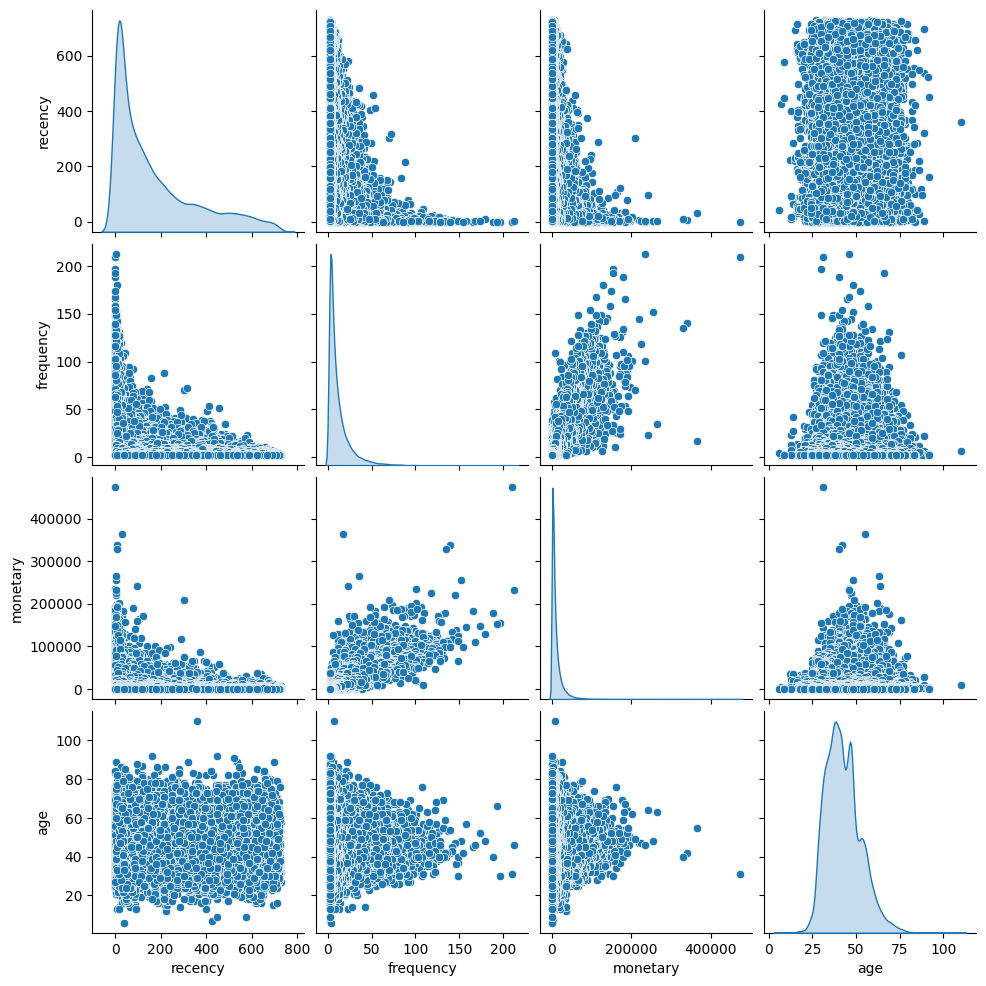

In [58]:
sns.pairplot(customers, diag_kind='kde')

#### Standarisasi

In [59]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(customers.astype(float))

In [65]:
df_std = pd.DataFrame(customers_std, columns=customers.columns.to_list())

## Modelling

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(customers_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
df_std['clusters'] = kmeans.labels_
customers['clusters'] = kmeans.labels_

In [68]:
customers

,recency,frequency,monetary,age,clusters
0,0,210,473748.0,31.0,1
1,6,140,338917.0,42.0,1
2,10,135,328600.0,40.0,1
3,95,23,241850.0,64.0,1
4,4,152,255262.0,48.0,1
...,...,...,...,...,...
62974,87,2,960.0,34.0,3
62975,119,2,910.0,38.0,3
62976,37,2,284.0,33.0,3
62977,462,2,330.0,47.0,0


### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

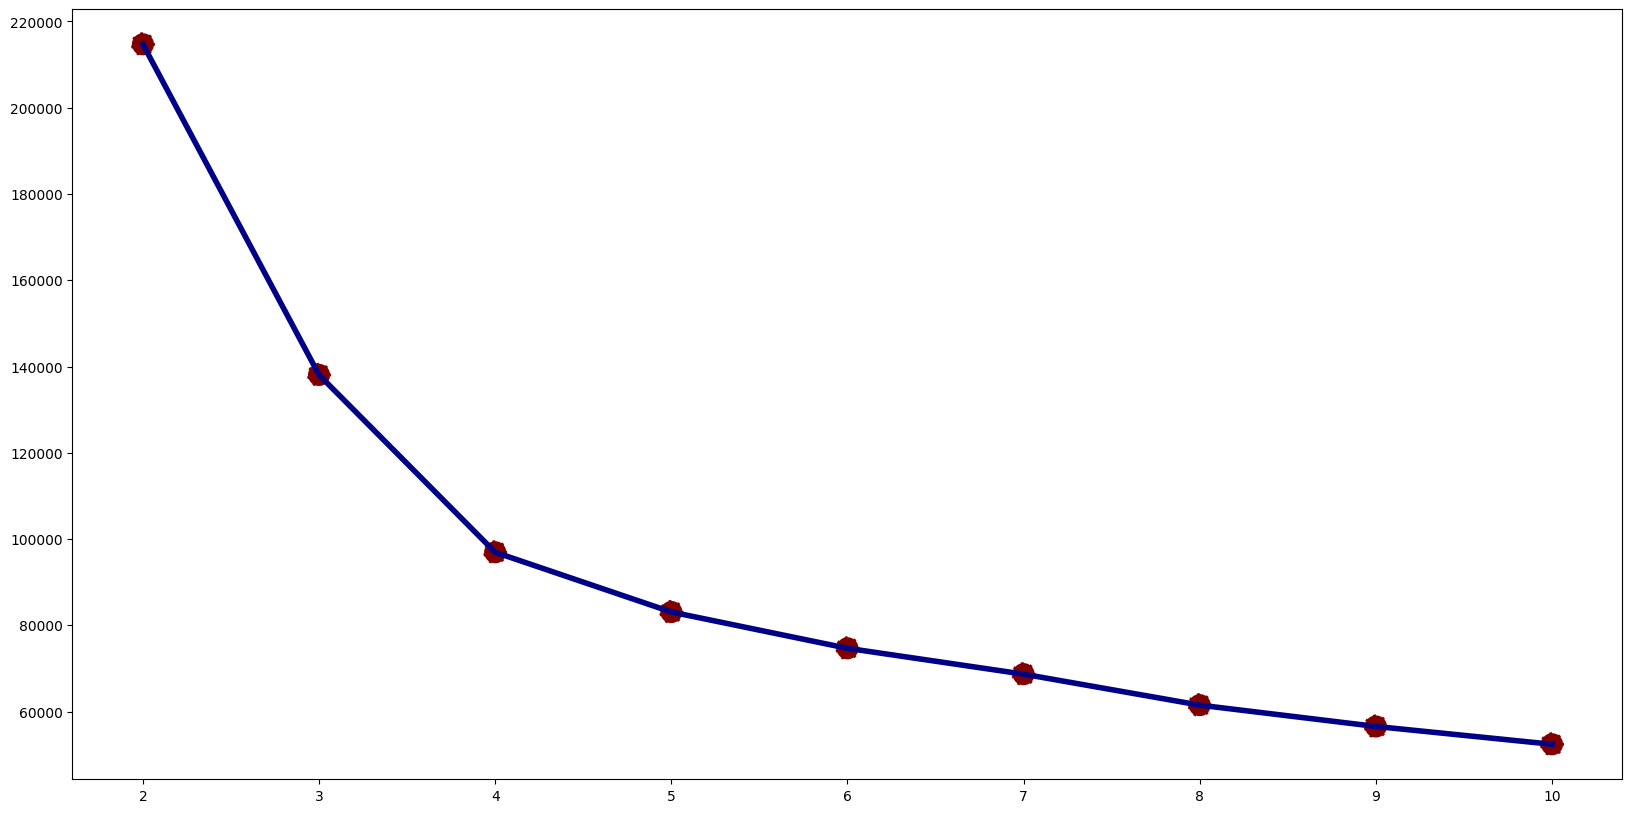

In [71]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Berdasarkan inertia, diperoleh cluster optimal adalah 4

### PCA

In [73]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = customers['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,21.238646,20.317662,1.0
1,14.634884,14.359759,1.0
2,14.131763,13.837077,1.0
3,7.266714,8.528356,1.0
4,12.502510,12.348904,1.0


<Axes: xlabel='PC 1', ylabel='PC 2'>

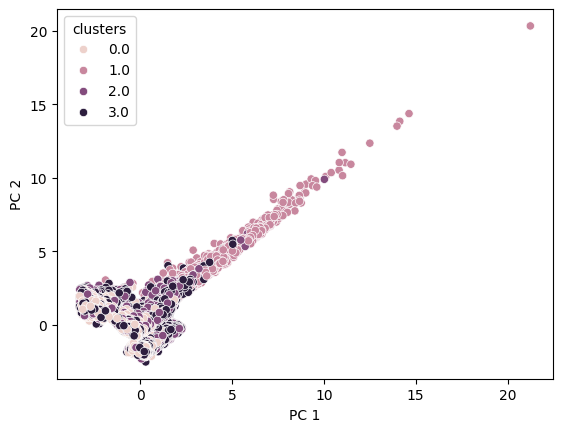

In [75]:
sns.scatterplot(x='PC 1', y='PC 2', hue='clusters', data=data_pca)

###